# 구매이력 데이터 클러스터링

## 0. 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
import dataload
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
tqdm.pandas()

In [2]:
buy_full = dataload.load_buy()

In [3]:
buy_full.head()

,date,sex,age,big_cat,sm_cat,qty
0,20180101,F,20,식품,가공란,37
1,20180101,F,30,식품,가공란,16
2,20180101,F,40,식품,가공란,9
3,20180101,F,50,식품,가공란,3
4,20180101,M,20,식품,가공란,13


## 1. 데이터 정제

In [4]:
buy_full['year'] = buy_full['date'].apply(lambda x :str(x)[:4])
buy_full['date'] = buy_full['date'].apply(lambda x : pd.to_datetime(str(x), format='%Y%m%d'))
buy_2018 = buy_full[buy_full.year=='2018'][['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']]
buy_2019 = buy_full[buy_full.year=='2019'][['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']]
buy_2018.shape, buy_2019.shape

((1005487, 6), (1051412, 6))

### 1-1. 2018, 2019 데이터를 요일에 맞추기

In [5]:
buy_2018["date"] = buy_2018["date"] + datetime.timedelta(days=-1)
buy_2018['date'] = buy_2018["date"].apply(lambda x : x.replace(year=2018, month=12, day=31) if x==datetime.date(2017, 12, 31) else x)

### 1-2. 데이터 재구조화

In [7]:
buy_2018_cat = buy_2018.groupby(['date', 'big_cat', 'sm_cat']).sum('qty').reset_index()[['date', 'big_cat', 'sm_cat', 'qty']]
buy_2019_cat = buy_2019.groupby(['date', 'big_cat', 'sm_cat']).sum('qty').reset_index()[['date', 'big_cat', 'sm_cat', 'qty']]
buy_2018_cat["date"] = buy_2018_cat["date"].apply(lambda x : str(x)[5:10])
buy_2019_cat["date"] = buy_2019_cat["date"].apply(lambda x : str(x)[5:10])
buy_2018_ts = pd.pivot_table(buy_2018_cat, index=['big_cat', 'sm_cat'], columns="date", values="qty")
buy_2019_ts = pd.pivot_table(buy_2019_cat, index=['big_cat', 'sm_cat'], columns="date", values="qty")
buy_2018_ts.shape, buy_2019_ts.shape

((383, 365), (383, 365))

In [8]:
buy_2018_ts.head()

date             01-01  01-02  01-03  01-04  01-05  01-06  01-07  01-08  \
big_cat sm_cat                                                            
냉난방가전   가스온수기      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        가열식 가습기   23.0   12.0   15.0   18.0   11.0   17.0   15.0   16.0   
        공기정화 용품  191.0  161.0  118.0  196.0   98.0  100.0  204.0  197.0   
        공기청정기    147.0  103.0   77.0  141.0   74.0   62.0  166.0   90.0   
        난방용 열풍기    NaN    NaN    1.0    1.0    1.0    NaN    1.0    2.0   

date             01-09  01-10  ...  12-22  12-23  12-24  12-25  12-26  12-27  \
big_cat sm_cat                 ...                                             
냉난방가전   가스온수기      NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
        가열식 가습기   16.0   15.0  ...   11.0   15.0   15.0   21.0   14.0   32.0   
        공기정화 용품  110.0  142.0  ...  178.0  168.0  130.0  172.0  135.0  130.0   
        공기청정기     96.0   78.0  ...  235.0  165.0   84.0  148.0   95.0  102.0   
        난방용 열풍기    1.0    2.0  ...    NaN    3.0    NaN    1.0    2.0    6.0   

date             12-28  12-29  12-30  12-31  
big_cat sm_cat                               
냉난방가전   가스온수기      NaN    NaN    NaN    NaN  
        가열식 가습기   15.0   23.0   16.0    7.0  
        공기정화 용품   61.0   80.0  150.0  120.0  
        공기청정기     84.0   88.0  289.0  106.0  
        난방용 열풍기    NaN    NaN    3.0    NaN  

[5 rows x 365 columns]

In [9]:
buy_2019_ts.head()

date             01-01  01-02  01-03  01-04  01-05  01-06  01-07  01-08  \
big_cat sm_cat                                                            
냉난방가전   가스온수기      NaN    1.0    NaN    NaN    NaN    NaN    1.0    NaN   
        가열식 가습기   26.0   27.0   27.0   20.0   12.0   17.0   18.0   21.0   
        공기정화 용품  116.0  160.0  144.0  142.0  114.0  111.0  177.0  169.0   
        공기청정기    138.0  159.0  113.0   93.0  102.0  114.0  165.0   86.0   
        난방용 열풍기    NaN    2.0    NaN    NaN    NaN    NaN    9.0    2.0   

date             01-09  01-10  ...  12-22  12-23  12-24  12-25  12-26  12-27  \
big_cat sm_cat                 ...                                             
냉난방가전   가스온수기      1.0    1.0  ...    NaN    NaN    NaN    NaN    NaN    1.0   
        가열식 가습기   27.0   15.0  ...   27.0   29.0   19.0   10.0   20.0   19.0   
        공기정화 용품  148.0  153.0  ...  155.0  200.0  245.0  182.0  171.0  148.0   
        공기청정기    156.0  198.0  ...   64.0  112.0  124.0  102.0  484.0   95.0   
        난방용 열풍기    1.0    NaN  ...    NaN    1.0    1.0    NaN    NaN    1.0   

date             12-28  12-29  12-30  12-31  
big_cat sm_cat                               
냉난방가전   가스온수기      NaN    NaN    NaN    NaN  
        가열식 가습기   14.0    7.0   18.0   15.0  
        공기정화 용품  136.0  105.0  196.0  211.0  
        공기청정기     55.0   85.0  135.0   78.0  
        난방용 열풍기    NaN    NaN    1.0    1.0  

[5 rows x 365 columns]

### 1-3. 결측치 처리

In [10]:
buy_2018_ts = buy_2018_ts.fillna(0)
buy_2019_ts = buy_2019_ts.fillna(0)

In [11]:
buy_ts = (buy_2018_ts + buy_2019_ts)/2
buy_ts.shape

(383, 365)

In [12]:
buy_ts.head()

date             01-01  01-02  01-03  01-04  01-05  01-06  01-07  01-08  \
big_cat sm_cat                                                            
냉난방가전   가스온수기      0.0    0.5    0.0    0.0    0.0    0.0    0.5    0.0   
        가열식 가습기   24.5   19.5   21.0   19.0   11.5   17.0   16.5   18.5   
        공기정화 용품  153.5  160.5  131.0  169.0  106.0  105.5  190.5  183.0   
        공기청정기    142.5  131.0   95.0  117.0   88.0   88.0  165.5   88.0   
        난방용 열풍기    0.0    1.0    0.5    0.5    0.5    0.0    5.0    2.0   

date             01-09  01-10  ...  12-22  12-23  12-24  12-25  12-26  12-27  \
big_cat sm_cat                 ...                                             
냉난방가전   가스온수기      0.5    0.5  ...    0.0    0.0    0.0    0.0    0.0    0.5   
        가열식 가습기   21.5   15.0  ...   19.0   22.0   17.0   15.5   17.0   25.5   
        공기정화 용품  129.0  147.5  ...  166.5  184.0  187.5  177.0  153.0  139.0   
        공기청정기    126.0  138.0  ...  149.5  138.5  104.0  125.0  289.5   98.5   
        난방용 열풍기    1.0    1.0  ...    0.0    2.0    0.5    0.5    1.0    3.5   

date             12-28  12-29  12-30  12-31  
big_cat sm_cat                               
냉난방가전   가스온수기      0.0    0.0    0.0    0.0  
        가열식 가습기   14.5   15.0   17.0   11.0  
        공기정화 용품   98.5   92.5  173.0  165.5  
        공기청정기     69.5   86.5  212.0   92.0  
        난방용 열풍기    0.0    0.0    2.0    0.5  

[5 rows x 365 columns]

## 2. 시계열 클러스터링  
`식품` 대분류 데이터

In [13]:
buy_1 = buy_ts.loc[('냉난방가전',)]
buy_2 = buy_ts.loc[('뷰티',)]
buy_3 = buy_ts.loc[('식품',)]

### 2-1. 정규화

In [14]:
avg_lst = []; std_lst = []
for idx, row in tqdm(buy_3.iterrows()):
    avg_lst.append(row.mean())
    std_lst.append(row.std())

0it [00:00, ?it/s]

In [15]:
buy_3['avg'] = avg_lst
buy_3['std'] = std_lst
buy_3.head()

date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,avg,std
sm_cat,,,,,,,,,,,,,,,,,,,,,
가공란,197.0,200.5,158.5,128.0,147.5,164.0,212.5,234.0,250.0,185.5,...,141.0,316.5,255.0,262.0,114.0,138.0,203.5,151.0,183.620548,67.424066
가자미,19.0,26.0,20.0,33.0,15.5,23.5,43.0,28.0,37.5,42.5,...,15.5,30.0,22.0,46.0,33.5,23.5,31.0,39.0,26.532877,13.565228
갈비/찜/바비큐용 돈육,15.0,11.0,13.0,9.0,16.5,10.0,13.5,17.0,17.0,13.5,...,25.5,28.0,19.0,13.5,28.0,22.5,26.0,29.5,18.553425,6.656652
갈비용 우육,9.0,3.0,7.0,5.0,10.0,9.0,3.0,4.5,3.0,16.0,...,14.5,17.0,13.0,10.5,17.0,19.0,11.5,12.0,9.076712,4.283675
갈치,104.5,243.0,84.5,97.0,81.5,98.5,71.0,92.0,206.5,148.5,...,115.0,87.0,70.0,95.0,141.0,52.5,83.5,58.0,101.845205,83.522444


In [16]:
for i in tqdm(range(len(buy_3))):
    for j in range(365):
        buy_3.iloc[i,j] = (buy_3.iloc[i,j] - buy_3.iloc[i,365])/buy_3.iloc[i,366]

  0%|          | 0/212 [00:00<?, ?it/s]

In [17]:
buy_3 = buy_3.drop(['avg','std'], axis=1)

## 3. Time-series Clustering

In [18]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score

### DTW

#### 3-1. 최적 k

In [19]:
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(2, 7):
        ts_clustering = TimeSeriesKMeans(n_clusters=i, max_iter=param_max_iter, random_state=1234, metric = 'dtw')
        ts_clustering.fit(data)
        distortions.append(ts_clustering.inertia_)

    plt.plot(range(2, 7), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()

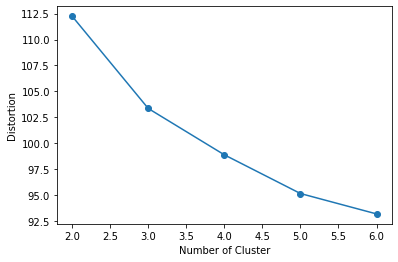

Wall time: 5min 44s


In [20]:
%%time
visualize_elbowmethod(buy_3)

최적 K 개수 : 5

#### 3-2. Clustering

In [21]:
%%time
model_dtw = TimeSeriesKMeans(n_clusters=5, init='random', n_init=10, max_iter=300, random_state=1234, metric = 'dtw').fit(buy_3)

Wall time: 7min 43s


In [22]:
result_dtw = model_dtw.predict(buy_3)
buy_3['cluster'] = result_dtw
buy_3.head()

C:\ProgramData\Anaconda3\envs\tensorflow2_py36\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 212 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,cluster
sm_cat,,,,,,,,,,,,,,,,,,,,,
가공란,0.198437,0.250348,-0.372575,-0.824936,-0.535722,-0.291002,0.428326,0.747203,0.984507,0.027875,...,-0.024035,-0.632127,1.970802,1.058664,1.162485,-1.032577,-0.676621,0.294842,-0.483812,2
가자미,-0.555308,-0.039283,-0.481590,0.476743,-0.813320,-0.223577,1.213922,0.108153,0.808473,1.177063,...,-0.481590,-0.813320,0.255589,-0.334154,1.435075,0.513602,-0.223577,0.329307,0.919050,2
갈비/찜/바비큐용 돈육,-0.533816,-1.134718,-0.834267,-1.435170,-0.308477,-1.284944,-0.759154,-0.233364,-0.233364,-0.759154,...,0.818215,1.043554,1.419118,0.067087,-0.759154,1.419118,0.592877,1.118667,1.644457,3
갈비용 우육,-0.017908,-1.418575,-0.484797,-0.951686,0.215536,-0.017908,-1.418575,-1.068408,-1.418575,1.616203,...,-0.017908,1.266036,1.849647,0.915870,0.332259,1.849647,2.316536,0.565703,0.682425,3
갈치,0.031785,1.690022,-0.207671,-0.058011,-0.243590,-0.040052,-0.369304,-0.117875,1.253014,0.558590,...,-0.620734,0.157500,-0.177739,-0.381277,-0.081956,0.468794,-0.590802,-0.219644,-0.524951,4


In [23]:
buy_3_dtw = buy_3.reset_index()
buy_3_dtw.head()

date,sm_cat,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,...,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,cluster
0,가공란,0.198437,0.250348,-0.372575,-0.824936,-0.535722,-0.291002,0.428326,0.747203,0.984507,...,-0.024035,-0.632127,1.970802,1.058664,1.162485,-1.032577,-0.676621,0.294842,-0.483812,2
1,가자미,-0.555308,-0.039283,-0.481590,0.476743,-0.813320,-0.223577,1.213922,0.108153,0.808473,...,-0.481590,-0.813320,0.255589,-0.334154,1.435075,0.513602,-0.223577,0.329307,0.919050,2
2,갈비/찜/바비큐용 돈육,-0.533816,-1.134718,-0.834267,-1.435170,-0.308477,-1.284944,-0.759154,-0.233364,-0.233364,...,0.818215,1.043554,1.419118,0.067087,-0.759154,1.419118,0.592877,1.118667,1.644457,3
3,갈비용 우육,-0.017908,-1.418575,-0.484797,-0.951686,0.215536,-0.017908,-1.418575,-1.068408,-1.418575,...,-0.017908,1.266036,1.849647,0.915870,0.332259,1.849647,2.316536,0.565703,0.682425,3
4,갈치,0.031785,1.690022,-0.207671,-0.058011,-0.243590,-0.040052,-0.369304,-0.117875,1.253014,...,-0.620734,0.157500,-0.177739,-0.381277,-0.081956,0.468794,-0.590802,-0.219644,-0.524951,4


In [24]:
buy_3_dtw.to_csv('../data/food_tsclustering.csv', encoding='CP949', index = False)
buy_3_dtw = pd.read_csv('../data/food_tsclustering.csv', encoding='CP949')

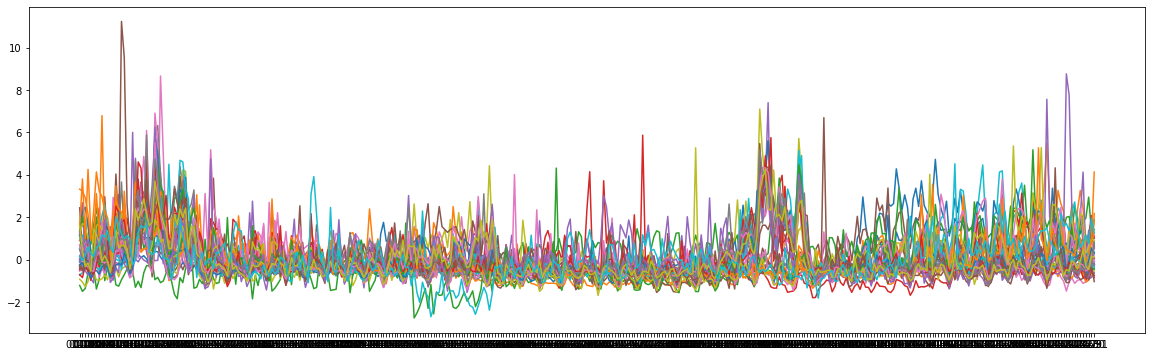

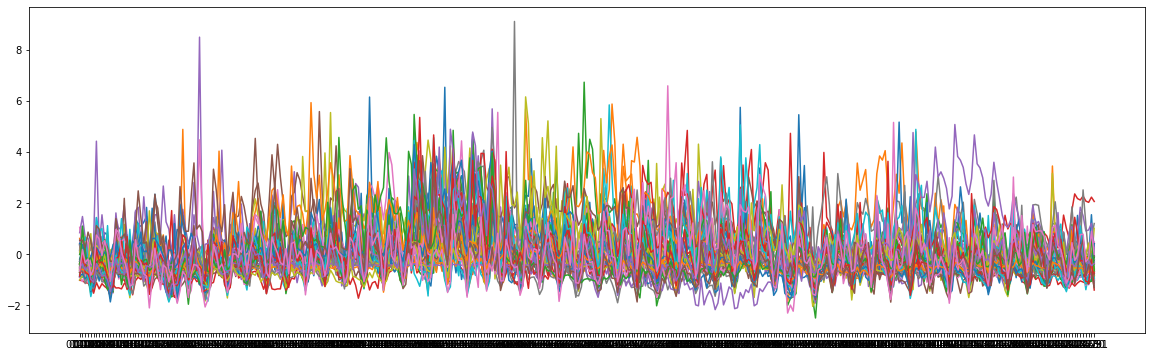

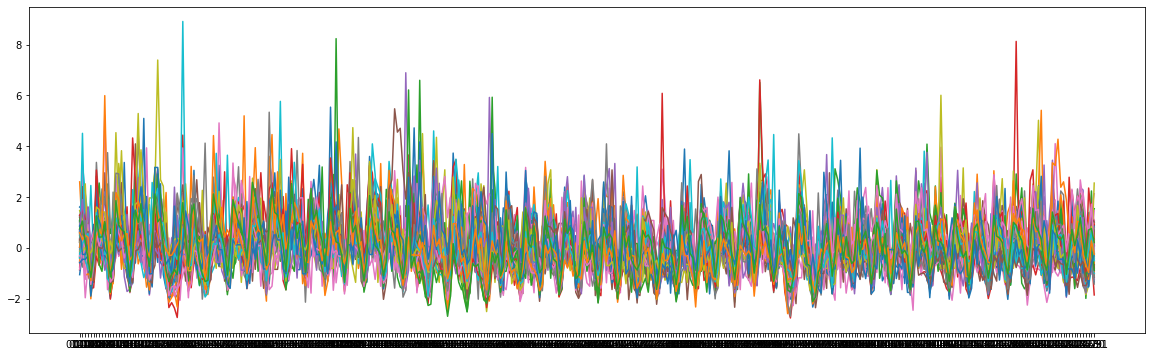

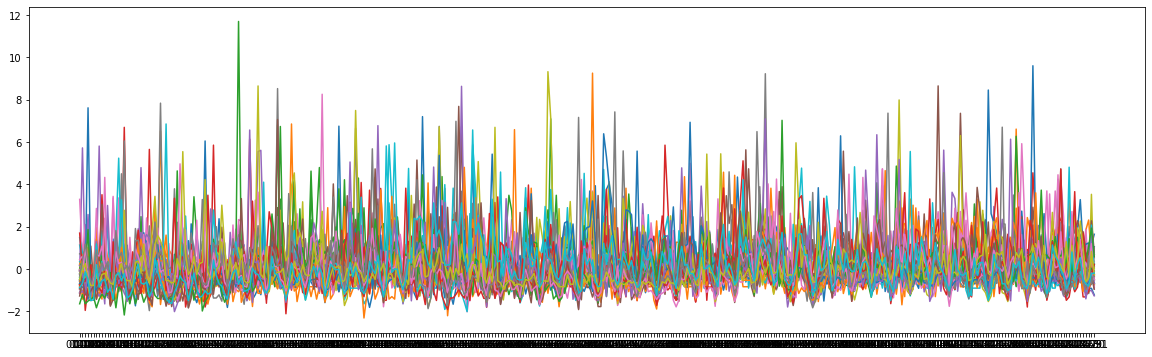

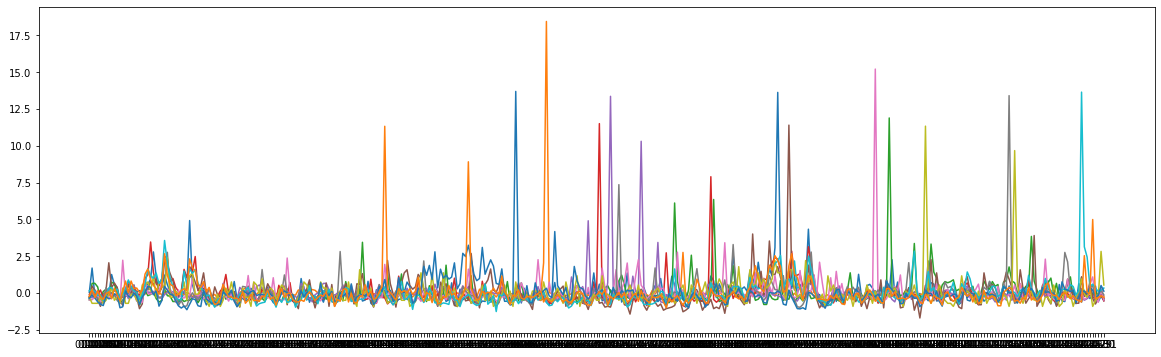

In [25]:
for i in range(5):
    clusters = buy_3_dtw.set_index('sm_cat')[buy_3_dtw.set_index('sm_cat')['cluster']==i]
    clusters.drop(['cluster'], axis=1, inplace=True)
    plt.figure(figsize=(20,6))
    plt.plot(clusters.T)
    plt.show

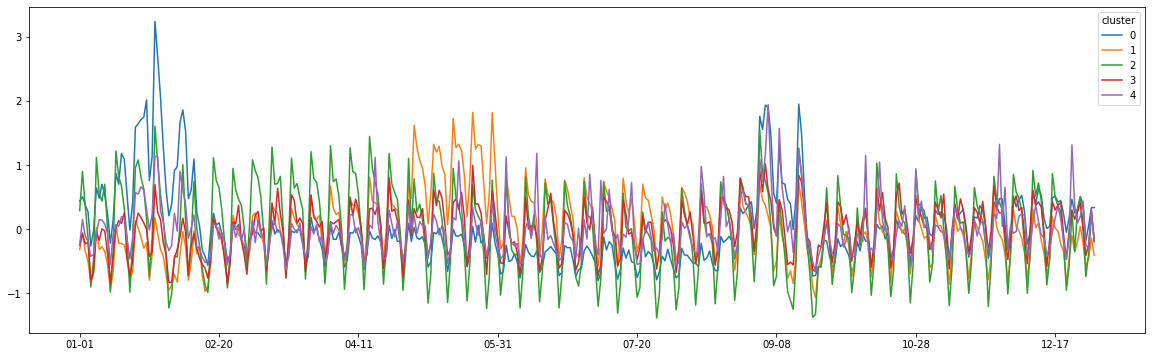

In [26]:
plt.rcParams["figure.figsize"]=(20,6)
buy_3_dtw.groupby(['cluster']).mean().T.plot()
plt.show()

In [27]:
pd.set_option('display.max_rows', 500)

In [28]:
print(buy_3_dtw[buy_3_dtw["cluster"]==0]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==0]["sm_cat"]

(40,)


5             감/홍시
6       감귤/한라봉/오렌지
8             감말랭이
19          건어물 멸치
22          건어물 황태
29           견과류 밤
31       견과류 카카오닙스
39          곶감/반건시
42            과일세트
47            굴 생물
48           굴비/조기
63          대게/킹크랩
66           돼지 곱창
69     딸기/복분자/블루베리
71             랍스타
78            무/배추
108      소고기 등심/안심
110          수산 생물
122           양념우육
137             옥돔
145            유자차
146         유제품 음료
147            율무차
150       인삼/수삼/산삼
157          전복 생물
158            전통주
162             조개
164         차 선물세트
175        코코아/핫초코
186           표고버섯
192            한우육
195           해초류 
199           혼합견과
200            혼합곡
202        홍삼 분말/환
203          홍삼 음료
204       홍삼/인삼 제품
205        홍삼액/홍삼정
206      홍삼절편/홍삼정과
210              회
Name: sm_cat, dtype: object

In [29]:
print(buy_3_dtw[buy_3_dtw["cluster"]==1]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==1]["sm_cat"]

(47,)


9                감자
13              건대추
23              건자두
24              건포도
28        견과류 마카다미아
35               계란
37       고추/피망/파프리카
38              곡물차
51           기타 주스류
60     다이어트용 헬스보충식품
65           도라지/더덕
72            레몬/자몽
75            마늘/생강
79              무김치
81              물김치
82              미나리
83        미숫가루/곡물가루
85          밀크티/티라떼
87            바나나우유
91             배추김치
94       복분자/석류/과실즙
103         생닭/닭부분육
105              생수
109          소고기 육회
114             시금치
115          식혜/수정과
119            아이스티
126          어린이 음료
130             에이드
133       오리고기/훈제오리
135           오이/가지
138             옥수수
148           음용 식초
149            이온음료
160        절임배추/김치속
166        참외/메론/수박
168            초코우유
169           카페 푸드
179          키위/참다래
180             탄산수
181            탄산음료
182             토마토
185        포도/거봉/체리
187     프라페/버블티 파우더
188         프로바이오틱스
196             허브차
198              호박
Name: sm_cat, dtype: object

In [30]:
print(buy_3_dtw[buy_3_dtw["cluster"]==2]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==2]["sm_cat"]

(63,)


0                가공란
1                가자미
7         감마리놀렌산 영양제
11               건강즙
12            건강즙/녹용
16           건어물 건새우
18         건어물 마른오징어
27            견과류 땅콩
34            견과류 호두
36               고등어
44          과채 음료/주스
49     글루코사민/키토산 영양제
50            기타 농산물
55                나물
57                녹차
58             느타리버섯
59           다이어트보조식
62              닭가슴살
67                두유
68              둥굴레차
70              딸기우유
73         루테인/눈 영양제
76              메추리알
88            반건조고구마
90          배/포도/과일즙
93               보리차
95                부추
96          브로콜리/셀러리
97               비타민
98        비타민/화이바 음료
107               선식
112     숙취/에너지/건강 음료
116                쌀
117              쌈채소
118       아몬드유/코코넛밀크
120           야채/호박즙
123          양배추/양상추
124           양파/마늘즙
132             영지버섯
134    오메가3/스쿠알렌 영양제
139             옥수수차
141          요거트/발효유
142            우엉/연근
143             원두커피
151           인스턴트커피
153           잡곡 씨드류
155       장조림/카레용 돈육
156          

In [31]:
print(buy_3_dtw[buy_3_dtw["cluster"]==3]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==3]["sm_cat"]

(50,)


2      갈비/찜/바비큐용 돈육
3            갈비용 우육
10              갓김치
15             건바나나
20           건어물 쥐포
21          건어물 진미채
25              게장류
26              견과류
32          견과류 캐슈넛
40              과실차
41              과일류
43       과일채소 분말/분태
45        구이/수육용 돈육
46           국내산 돈육
53              김치류
54               꽃게
56               낙지
61            닭 양념육
64             더치커피
74             마/야콘
77            명태/동태
84            믹스 채소
86      바나나/파인애플/망고
92              백김치
99               삼치
101           새송이버섯
102           새우/대하
106        생식/선식 분말
111            수입우육
113       스피루리나 영양제
121           양념 돈육
125         어란(생선알)
127          어린이영양제
128           어린이홍삼
129        어린잎/새싹채소
131         연어/훈제연어
136             오징어
140          옻/칡/쑥즙
144       윙봉/닭다리/날개
152              잡곡
154              장어
161             젓갈류
163             주꾸미
176     콜라겐/코큐텐 영양제
178        클로렐라 영양제
184             파김치
189      프로폴리스/로얄젤리
190       한방 분말/환제품
207              홍어
209             환자식


In [32]:
print(buy_3_dtw[buy_3_dtw["cluster"]==4]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==4]["sm_cat"]

(12,)


4             갈치
14           건망고
17       건어물 노가리
30      견과류 잣/은행
33     견과류 피스타치오
52     기타 한방/환제품
80            문어
89           반찬류
100         상황버섯
104          생선류
183         파/양파
201        홍삼 간식
Name: sm_cat, dtype: object